In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math 
import os
%matplotlib inline


# Question 1


**Part I**




In [2]:
path=r'../images/fg.jpg'
fg_raw = cv2.imread(path)
path=r'../images/bg.jpg'
bg_raw = cv2.imread(path)
fg = cv2.cvtColor(fg_raw, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg_raw, cv2.COLOR_BGR2RGB)

In [3]:
def graft(fg,bg):
    lower_green = np.array([0, 120, 0])     ##[R value, G value, B value]
    upper_green = np.array([170, 255, 150]) 
    mask = cv2.inRange(fg, lower_green, upper_green)
    masked_image = np.copy(fg)
    masked_image[mask != 0] = [255, 255, 255]
    dimension=fg.shape

    cropped_background = bg[0:dimension[0], 0:dimension[1]]
    cropped_background[mask == 0] = [0, 0, 0]
    final_image = cropped_background + masked_image
    return final_image

(-0.5, 1279.5, 719.5, -0.5)

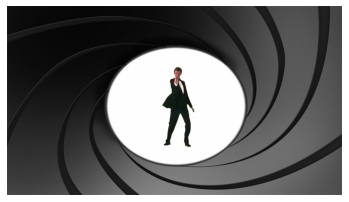

In [4]:
res=graft(fg,bg)
plt.imshow(res)
plt.axis('off')

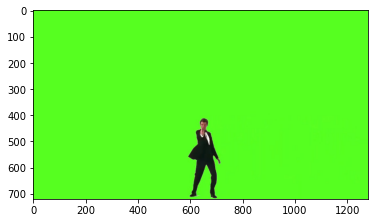

In [5]:
shift =np.copy(fg)
dim=shift.shape
i=dim[0]-1
while (i>180):
  shift[i]=shift[i-180]
  i=i-1
plt.imshow(shift)

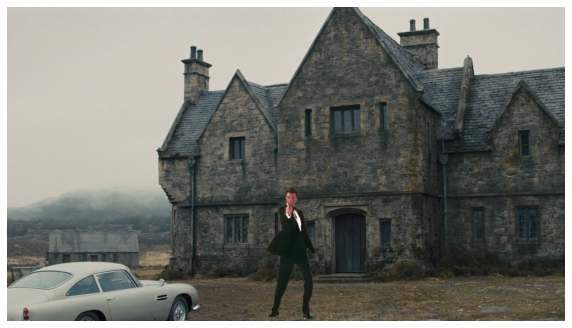

In [6]:
path=r'../images/mansion.jpg'
mansion_raw = cv2.imread(path)
mansion = cv2.cvtColor(mansion_raw, cv2.COLOR_BGR2RGB)

res= graft(shift,mansion)
fig = plt.figure(figsize=[10,10])
plt.imshow(res)
plt.axis('off')
plt.show()

(-0.5, 311.5, 415.5, -0.5)

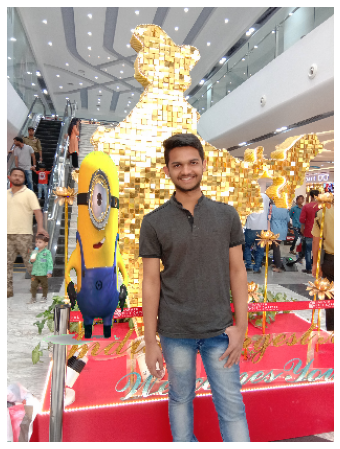

In [27]:
path=r'../images/1_3.jpg'
mini_raw = cv2.imread(path)
mini = cv2.cvtColor(mini_raw, cv2.COLOR_BGR2RGB)

path=r'../images/raja.jpg'
raja_raw = cv2.imread(path)
raja = cv2.cvtColor(raja_raw, cv2.COLOR_BGR2RGB)
dim = raja.shape
raja=cv2.resize(raja,(int(dim[1]/10),int(dim[0]/10)))
mini=cv2.resize(mini,(int(dim[1]/10),int(dim[0]/10)))

res=graft(mini,raja)
fig = plt.figure(figsize=[8,8])
plt.imshow(res)
plt.axis('off')

The Green Screen here is used to differentiate the required image , and now we can use this image where ever we want , This technique is popularly known as croma keying

In Q1 
 >**Part 1** : I used masking technique , i.e, specified the green colour threshold and replaced the pixels in that range with 255(white) and this masked image is added to the background after cropping it .
 
 >**Part 2** : I initially shifted the fg.jpg since if directly graft it on mansion it doesn't fit well or look realstically, so I used a shifted fg and did the process done in part I
 
 >**Part 3** : I repeated the process in Part I but initially I had to resize the green screened image.

 **PART II**

>$ 1MB = 1024*1024 $ bytes $ $

Given is a RGB image 
>$ 1RGBpixel = 3 $ bytes $ $

Given Dimension of image is $1280*720 $ pixels $ $
>$ $ No of images $ = \frac{Total size}{size of image}$

>$ \implies $ No of images $ = \frac{4*1024*1024*1024}{1280*720*3} = 1553$

# Question 2

>$ 1MB = 1024*1024 $ bytes $ $

Given is a RGB image of square shape
>$ 1RGBpixel = 3 $ bytes $ $

let the dimensions of the image be $x*x$ 
>$ x^2*3 = 168.75 * 1024*1024$

>$ \therefore x = 7680 $

Dimension of image is $ 7680*7680 $ pixels $ $

# Question 3

We Know the Magnification equations of a convex lens as follows
>$ Magnification = \frac{h_i}{h_o}$

>$Magnification = \frac{-v}{u}$

>$\frac{-v}{u} = \frac{f}{f-u}$

>$\frac{h_i}{h_o} = \frac{-f}{f-u}$

Here, 

$h_o$ -> height of the object

$h_i$ -> height of the image

f  -> focal length of the lens

u  -> distance of the object from the lens (in out case 'd')

The values given are,
>$1024*1024 $ pixels $ = 10*10 $ mm $ $

>$ \implies $ pixel length will be $ \frac{10}{1024} $ mm $ $

> $ \therefore h_i = \frac{50}{2} * \frac{10}{1024} $ mm $ = 0.244$ mm $ = 0.0244 $ cm $ $ 

ho will be half of the given length
> $ \therefore h_o = \frac{t}{2} = \frac{32.8}{2} $ cm $ = 16.4 $ cm $  $ 

> $ f = 62.5 $ mm $ $

> $ u = d $

> $ \implies \frac{0.0244}{16.4} = \frac{-6.25}{6.25-d}$ 

> $ \therefore d = 42 metres $ 

In [30]:
d=6.25 + ((16.4/0.0244)*6.25)
print("Minimum distance is: "+str(int(d))+" cm "+" or "+str(int(d/100))+" metres ")

Minimum distance is: 4207 cm  or 42 metres 


# Question 4

**Part I**

In [8]:
def BitQuantizeImage(im,k):
    om=np.round(im*((2**k-1)/255))
    min=np.amin(om)
    max=np.amax(om)
    out=np.round(255*(om-min)/(max-min))
    return out.astype(np.uint8)

>The bitQuantisation is done by Dividing the image by "255" and multipling it with (2^k-1)

>The result is rounded off to the nearest integer.

>But the resultant image will be dark , so as to make it visible clearly we will map it to 0-255 by multiplying $255*\frac{resultant-min}{max-min}$

**Part II**

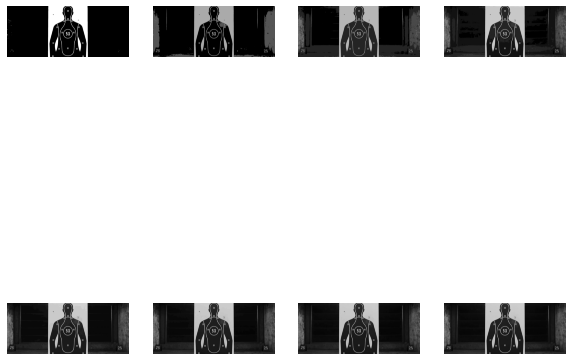

In [15]:
test_raw = cv2.imread('../images/007_test1.png')
test = cv2.cvtColor(test_raw,cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=[10,10])
for i in range(1,9):
  out = BitQuantizeImage(test,i)
  ax1 = fig.add_subplot(2,4,i)
  ax1.imshow(out,cmap='gray')
  plt.axis('off')
plt.show()

**Part III**

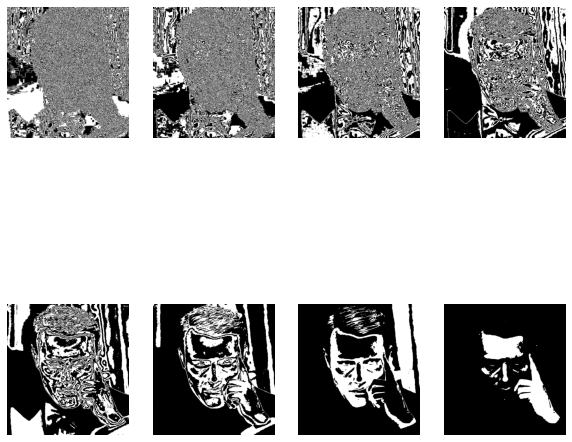

In [10]:
test_raw = cv2.imread('../images/007_test2.png')
test = cv2.cvtColor(test_raw,cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=[10,10])
for i in range(8):
    out = test & pow(2,i);
    ax1 = fig.add_subplot(2,4,i+1)
    ax1.imshow(out,cmap='gray')
    plt.axis('off')
plt.show()

>For getting the bit planes we have to get the bit value at Kth bit for kth bit plane, It is acheived by doing 'and' operation with 2^k 


**Part IV**

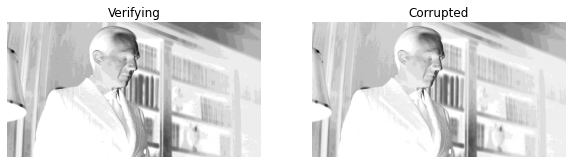

In [11]:
# my_roll = 2018102032 , therefore k=2 ,so mallory
mallory_raw = cv2.imread('../images/mallory.jpg')
mallory = cv2.cvtColor(mallory_raw,cv2.COLOR_BGR2GRAY)
mallory_corrupt_raw = cv2.imread('../images/mallory_corrupt.jpg')
mallory_corrupt = cv2.cvtColor(mallory_corrupt_raw,cv2.COLOR_BGR2RGB)

out = BitQuantizeImage(mallory_corrupt,4)
check = 255-out

fig=plt.figure(figsize=[10,10])

ax = fig.add_subplot(1,2,1)
ax.set_title('Verifying')
ax.imshow(out,cmap='gray')
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Corrupted')
ax.imshow(mallory_corrupt)
plt.axis('off')
plt.show()


> Took the Negative and applied 4-bitQuatization

>The reason for taking the 4-bit quantization is , it is observed that when plotted scattering of image vs image_corrupt a total of 16 levles is observed which implied a 4 bit quntization.


# Question 5

In [12]:
def linContrastStretching(im,a,b):
    min = np.amin(im)
    max = np.amax(im)
    res = (im - min)*((b-a)/(max - min)) + a
    return res.astype(np.uint8)

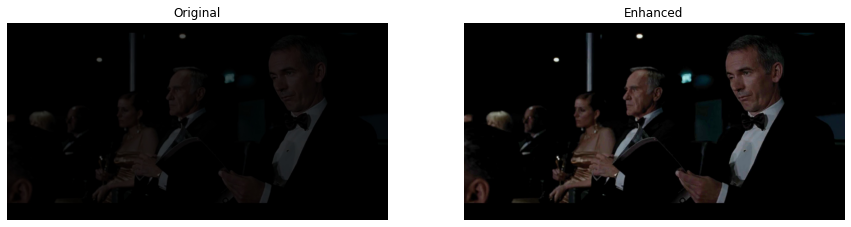

In [13]:
bad_raw = cv2.imread('../images/quantum_bad.jpg')
bad = cv2.cvtColor(bad_raw,cv2.COLOR_BGR2RGB)
res = linContrastStretching(bad,0,255)
fig=plt.figure(figsize=[15,15])
ax = fig.add_subplot(1,2,1)
ax.set_title('Original')
ax.imshow(bad)
plt.axis('off')

ax = fig.add_subplot(1,2,2)
ax.set_title('Enhanced')
ax.imshow(res)
plt.axis('off')
plt.show()

In [14]:
print("min of bad image: ",np.min(bad))
print("max of bad image: ",np.max(bad))

min of bad image:  0
max of bad image:  82


**Contrast Straching :**

>Given a Image which has a pixel intensities in range [$a_{low}$,$a_{high}$],  We can strech this range to [$a_{min}$,$a_{max}$], there by resulting in varying contrast.

>In our current problem our image has values between [0,82] there by resulting a darker image and We streched this to [0,255]

It is acheived by,
> $ a_{new} = a_{min} + (a- a_{low})*\frac{a_{max}-a_{min}}{a_{high}-a_{low}}$

> It is clear from the above formula that intensities will spread out from a smaller range to wider range. and also the streching of $a_{high}$ to $a_{max}$ assures the increase in brightness
